In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

#Reference: https://en.wikipedia.org/wiki/RLC_circuit

#Reference Gemini AI for some code I edited to solve ODE and plot

According to Wiki the differential equation we'd like to investigate is $\frac{d}{dt^2} I(t)+2\alpha*\frac{d}{dt}I(t) + \omega^2*I(t)=0$
Since $\alpha=\frac{R}{2L}$ then $\alpha=.1/(2*.01)=.1/.02=5$ and $\omega=\frac{1}{\sqrt(LC)}=\frac{1}{\sqrt(.01*.01)}=100$

Then $$\frac{d}{dt^2} I(t)+10*\frac{d}{dt}I(t) + 100^2*I(t)=0$

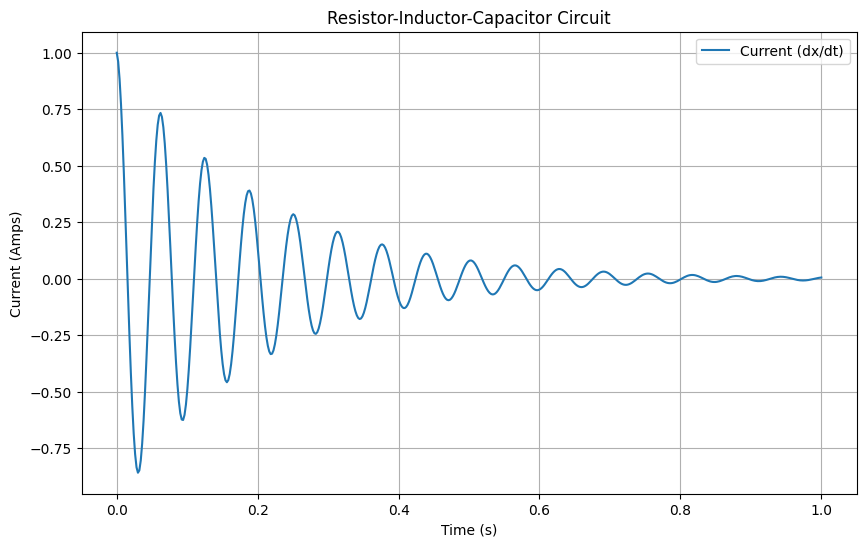

Final Position at t=1.0: -0.0000
Final Velocity at t=1.0: 0.0055


In [16]:
# Define the parameters (coefficients of the ODE)
m = 1.0  
b = 10  
k = 10_000 

# 1. Define the system of first-order ODEs
def damped_oscillator(t, y, m, b, k):
    # y[0] is x (position)
    # y[1] is dx/dt (current)
    
    dydt0 = y[1]  # dx/dt = current
    dydt1 = (-b/m) * y[1] - (k/m) * y[0] # d^2x/dt^2 = -(b/m)dx/dt - (k/m)x
    
    return [dydt0, dydt1]

# 2. Specify time span
t_span = (0, 1) # Solve from t=0 to t=10 seconds

# 3. Provide initial conditions [initial position, initial amps]
x0 = 0  #current
v0 = 1  
initial_conditions = [x0, v0]

# 4. Call solve_ivp
# We pass the parameters (m, b, k) using the 'args' argument
sol = solve_ivp(damped_oscillator, t_span, initial_conditions, 
                args=(m, b, k), dense_output=True, rtol=1e-6, atol=1e-8)

# 5. Interpret Results
# Generate points for plotting
t_plot = np.linspace(t_span[0], t_span[1], 500)
y_plot = sol.sol(t_plot) # y_plot[0] is position, y_plot[1] is Current

plt.figure(figsize=(10, 6))
#plt.plot(t_plot, y_plot[0], label='Position (x)')
plt.plot(t_plot, y_plot[1], label='Current (dx/dt)')
plt.xlabel('Time (s)')
plt.ylabel('Current (Amps)')
plt.title('Resistor-Inductor-Capacitor Circuit')
plt.grid(True)
plt.legend()
plt.show()

# If you just want the final values:
print(f"Final Position at t={sol.t[-1]}: {sol.y[0][-1]:.4f}")
print(f"Final Velocity at t={sol.t[-1]}: {sol.y[1][-1]:.4f}")